In [27]:
# Our standard modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities for image processing
import skimage.io
import skimage.exposure
import skimage.measure

# To allow for inline rendering of plots.
%matplotlib inline
gray = plt.cm.Greys_r

In [28]:
# Load the phase contrast image by providing the file path
phase_im = skimage.io.imread('ecoli_images/ecoli_phase_01.tif')

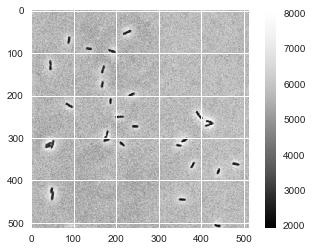

In [4]:
# Set the colormap for data display. 
gray = plt.cm.Greys_r

# Show the image
plt.imshow(phase_im, cmap=gray)

# Add a colorbar
plt.colorbar()

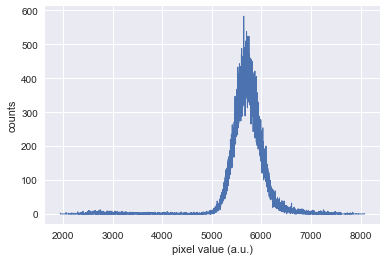

In [5]:
# Generate the histogram of the image. `skimage.exposure.histogram` will return
# the values of the histogram as well as the centers of the bins.
hist, bins = skimage.exposure.histogram(phase_im)

# Plot the histogram values versus the bin centers.
plt.plot(bins, hist, linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('counts')

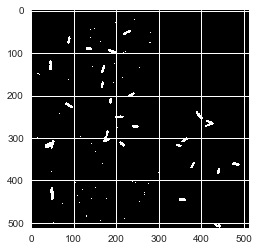

In [6]:
# Threshold the image showing pixels only below 5000 counts
thresh_val = 5000
thresh_im = phase_im < thresh_val

# Plot the image.
plt.imshow(thresh_im, cmap=gray)

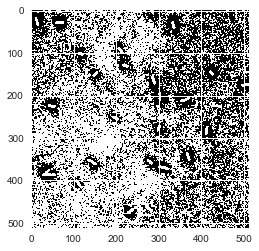

In [8]:
# Load another phase contrast image.
phase_im2 = skimage.io.imread('ecoli_images/ecoli_phase_02.tif')
                              

# Apply the threshold value of 5000 counts. 
thresh_im2 = phase_im2 < thresh_val

# Show the image.
plt.imshow(thresh_im2, cmap=gray)

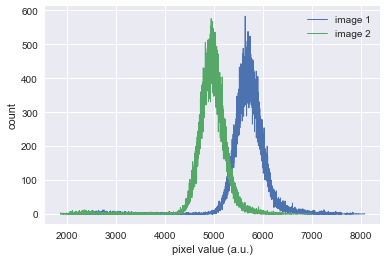

In [9]:
# Generate the histograms for each image.
hist_im1, bins_im1 = skimage.exposure.histogram(phase_im)
hist_im2, bins_im2 = skimage.exposure.histogram(phase_im2)

# Each histogram over eachother. 
plt.plot(bins_im1, hist_im1, label='image 1', linewidth=1)
plt.plot(bins_im2, hist_im2, label='image 2', linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('count')
plt.legend()

In [11]:
def normalize_im(im):
    im_norm = (im - im.min()) / (im.max() - im.min())
    return im_norm

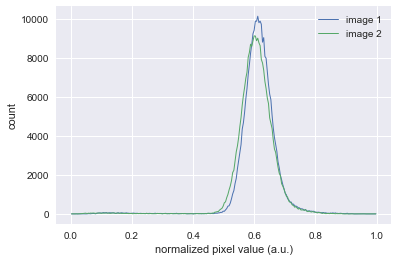

In [12]:
# Normalize both images.
phase_norm1 = normalize_im(phase_im)
phase_norm2 = normalize_im(phase_im2)

# Generate both histograms. 
hist_norm1, bins_norm1 = skimage.exposure.histogram(phase_norm1)
hist_norm2, bins_norm2 = skimage.exposure.histogram(phase_norm2)

# Plot both histograms on the same set of axes. 
plt.plot(bins_norm1, hist_norm1, label='image 1', linewidth=1)
plt.plot(bins_norm2, hist_norm2, label='image 2', linewidth=1)

# Add labels as expected. 
plt.xlabel('normalized pixel value (a.u.)')
plt.ylabel('count')
plt.legend()

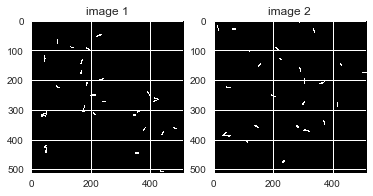

In [13]:
# Apply the threshold. 
thresh_val = 0.3
thresh_im1 = phase_norm1 < thresh_val
thresh_im2 = phase_norm2 < thresh_val

# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=1, ncols=2)
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the first image
ax[0].imshow(thresh_im1, cmap=gray)
ax[0].set_title('image 1')

# Plot the second image.
ax[1].imshow(thresh_im2, cmap=gray)
ax[1].set_title('image 2')

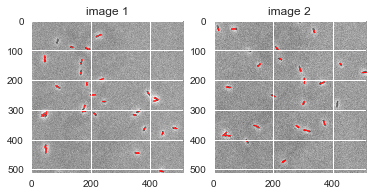

In [14]:
# Make copies of each normalized phase image. 
phase_copy1 = np.copy(phase_norm1)
phase_copy2 = np.copy(phase_norm2)

# Using the segmentation masks, color the pixels with a value of 1.0 wherever a
# segmented object exists. 
phase_copy1[thresh_im1] = 1.0
phase_copy2[thresh_im2] = 1.0

# Make an RGB image of the segmentation by generating a three dimensional array.
rgb_image1 = np.dstack((phase_copy1, phase_norm1, phase_norm1))
rgb_image2 = np.dstack((phase_copy2, phase_norm2, phase_norm2))

# Show both images again using a subplot. Since these are RGB, we won't need to 
# use a colormap.
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(rgb_image1)
ax[0].set_title('image 1')
ax[1].imshow(rgb_image2)
ax[1].set_title('image 2')

Number of objects found: 25


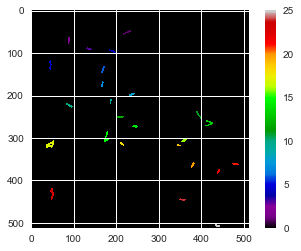

In [15]:
# Label each individual cell. 
im_lab, num_obj = skimage.measure.label(thresh_im1, return_num=True)
                                   
# Print out how many we identified. By eye, we expect around 25.
print("Number of objects found: %s" %num_obj)
# Show our labeled objects using a a different color map than gray. 
rainbow = plt.cm.spectral
plt.imshow(im_lab, cmap=rainbow)
plt.colorbar()

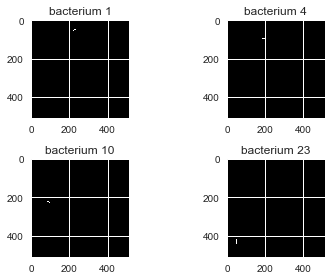

In [16]:
# Generate a subplot to look at four different bacteria. 
fig, ax = plt.subplots(nrows=2, ncols=2)

# Isolate bacteria 1, 4, 10, and 23.
bac_1 = im_lab == 1
bac_4 = im_lab == 4
bac_10 = im_lab == 10
bac_22 = im_lab == 23 


# Show each bacterium
ax[0, 0].imshow(bac_1, cmap=gray)
ax[0, 1].imshow(bac_4, cmap=gray)
ax[1, 0].imshow(bac_10, cmap=gray)
ax[1, 1].imshow(bac_22, cmap=gray)

# Add the titles. 
ax[0, 0].set_title('bacterium 1')
ax[0, 1].set_title('bacterium 4')
ax[1, 0].set_title('bacterium 10')
ax[1, 1].set_title('bacterium 23')

# Adjust the spacing so the labels don't overlap.
plt.tight_layout()

In [17]:
cell_pix = np.sum(bac_1)
print("The area of our single cell is %s pixels." %cell_pix)
# Convert pixels to physical units. 
ip_dist = 0.160  # In units of microns per pixel. 
cell_area = cell_pix * ip_dist**2
print("The area of our single cell is %s square microns." %cell_area)

The area of our single cell is 91 pixels.
The area of our single cell is 2.3296 square microns.


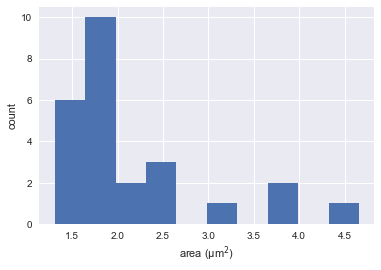

In [18]:
# Make an array where we'll store the cell areas.
areas = np.zeros(num_obj)

# Loop through each object. Remember that we have to start indexing at 1 in
# this case!
for i in range(num_obj):
    # Slice out the cell of interest. 
    cell = (im_lab == i + 1)
    
    # Compute the area and add it to our array
    areas[i] = np.sum(cell) * ip_dist**2

    
# Plot a histogram of our areas. 
plt.hist(areas, bins=10)
plt.xlabel('area (µm$^2$)')
plt.ylabel('count')

Segmented 24 single cells.


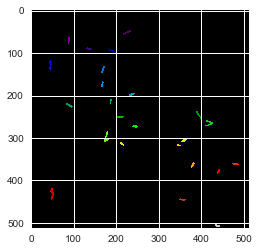

In [19]:
# Make an empty image the same size as our orignal binary image
approved_cells = np.zeros_like(thresh_im1)

# Loop through each object and test its area.
for i in range(num_obj):
    # Get the cell of interest.
    cell = (im_lab == i + 1)
    
    # Compute its area. 
    cell_area = np.sum(cell) * ip_dist**2
    
    # Test if it is within our bounds. 
    if (cell_area > 1.0) & (cell_area < 4.0):
        
        # Add our extraced cell to our blank image.
        approved_cells += cell
       
# Relabel and show the approved_cells mask   
approved_lab, num_obj = skimage.measure.label(approved_cells, return_num=True)

print("Segmented %s single cells." %num_obj)
plt.imshow(approved_lab, cmap=rainbow)

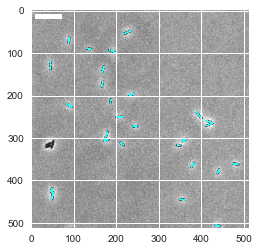

In [20]:
# Make a copy of the normalized phase image. 
phase_copy = np.copy(phase_norm1)

# Add a scale bar to the original image and the copy.
bar_length = int(10 / ip_dist)  # This needs to be an integer since it is in 
                                # units of pixels. 
    
phase_norm1[10:20, 10:10 + bar_length] = 1.0
phase_copy[10:20, 10:10 + bar_length] = 1.0

# Give the segmented pixels a value of 1.0
phase_copy[approved_cells] = 1.0

# Make an RGB image and show it. This time, we'll make them cyan. 
mask_rgb = np.dstack((phase_norm1, phase_copy, phase_copy))

# Show it off!
plt.imshow(mask_rgb)

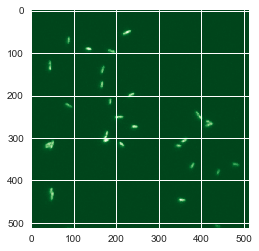

In [21]:
# Load the fluorescence image for this poisition. 
yfp_im = skimage.io.imread('ecoli_images/ecoli_yfp_01.tif')

# Show it with a green colormap. 
green = plt.cm.Greens_r
plt.imshow(yfp_im, cmap=green)

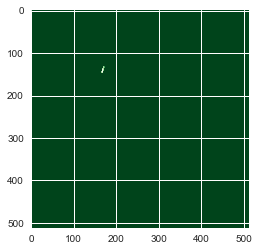

In [22]:
# Look at the intensity image only for cell 6. 
cell_id = 6
cell = (approved_lab == cell_id)

# Multiply the images. 
cell_yfp = cell * yfp_im

# Show the multiplied images.
plt.imshow(cell_yfp, cmap=green)

In [23]:
# Get the total cell intensity. 
total_int = np.sum(cell_yfp)
print('The total intensity of cell number 5 is %s counts.' %total_int)

The total intensity of cell number 5 is 166537 counts.


[ 301625.  142383.  195251.  173240.  229528.  166537.  158487.  205310.
  127625.  143005.  235514.  264884.  303886.  181615.  514422.  206709.
  173844.  131392.  142248.  108490.   79850.  359244.  198841.   68402.]
<class 'numpy.ndarray'>


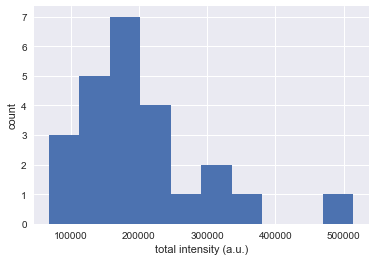

In [33]:
# Set up storage vectors for the cell areas and intensities
tot_ints = np.zeros(num_obj) 
cell_areas = np.zeros(num_obj)

# Loop through each cell. 
for i in range(num_obj):
    # Get the single cell mask. 
    cell = (approved_lab == i + 1)

    # Store the area.
    cell_areas[i] = np.sum(cell) * ip_dist**2
    
    # Multiply it with the fluorescence image. 
    int_im = cell * yfp_im

    # Store the total intensity
    tot_ints[i] = np.sum(int_im)
    
# Plot the histogram.
print(tot_ints)
print(type(tot_ints))
plt.figure()
plt.hist(tot_ints, bins=10)
plt.xlabel('total intensity (a.u.)')
plt.ylabel('count')

In [25]:
# Compute the mean fluorescence level.
mean_int = np.mean(tot_ints)
print('The mean single-cell intensity for this image is %s counts.' %mean_int)

The mean single-cell intensity for this image is 200513.833333 counts.


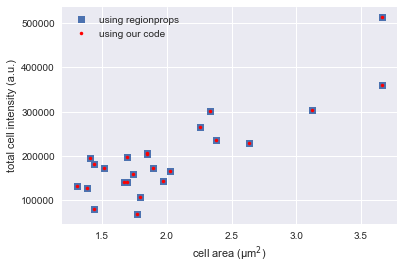

In [26]:
# Compute the region properties. 
props = skimage.measure.regionprops(approved_lab, intensity_image=yfp_im)

# Set up the storage vectors. 
regionprops_areas = np.zeros(num_obj)
regionprops_intensity = np.zeros(num_obj)

# Loop through each object and extract the properties. 
for i in range(len(props)):
    # Extract the areas. 
    regionprops_areas[i] = props[i].area * ip_dist**2
    
    # Extract the mean intensity.
    regionprops_intensity[i] = props[i].mean_intensity * props[i].area 
   

# Plot the intensity versus area to show that we get the same value.
plt.plot(regionprops_areas, regionprops_intensity, 's', label='using regionprops')
plt.plot(cell_areas, tot_ints, 'r.', label='using our code')
plt.xlabel('cell area (µm$^2$)')
plt.ylabel('total cell intensity (a.u.)') 
plt.legend()